In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

l1 = 7
l2 = 7
l3 = 7

In [2]:
def plot_coordinates(csv_file):
    df = pd.read_csv(csv_file)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(2, 1, figsize=(13, 7))  

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
def plot_subset_coordinates(csv_file, limit = 100):
    df = pd.read_csv(csv_file, nrows=limit)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [5]:
def displayWorkSpace(csv_file):
    data = pd.read_csv(csv_file)
    plt.scatter(data['x_scaled'], data['y_scaled'], color = 'lightsalmon')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.grid()

In [6]:
def randomStepSizeDataset():
    data = []
    for i in range(1, 150001):
        q1 = round(random.uniform(0, m.pi), 2)
        q2 = round(random.uniform(-m.pi, 0), 2)
        q3 = round(random.uniform(-m.pi / 2, m.pi / 2))

        theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
        x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
        y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
        data.append([x_s, y_s, theta_o, q1, q2, q3])

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])

    df.to_csv('Three Link_Random Step Size.csv', index = False)

randomStepSizeDataset()

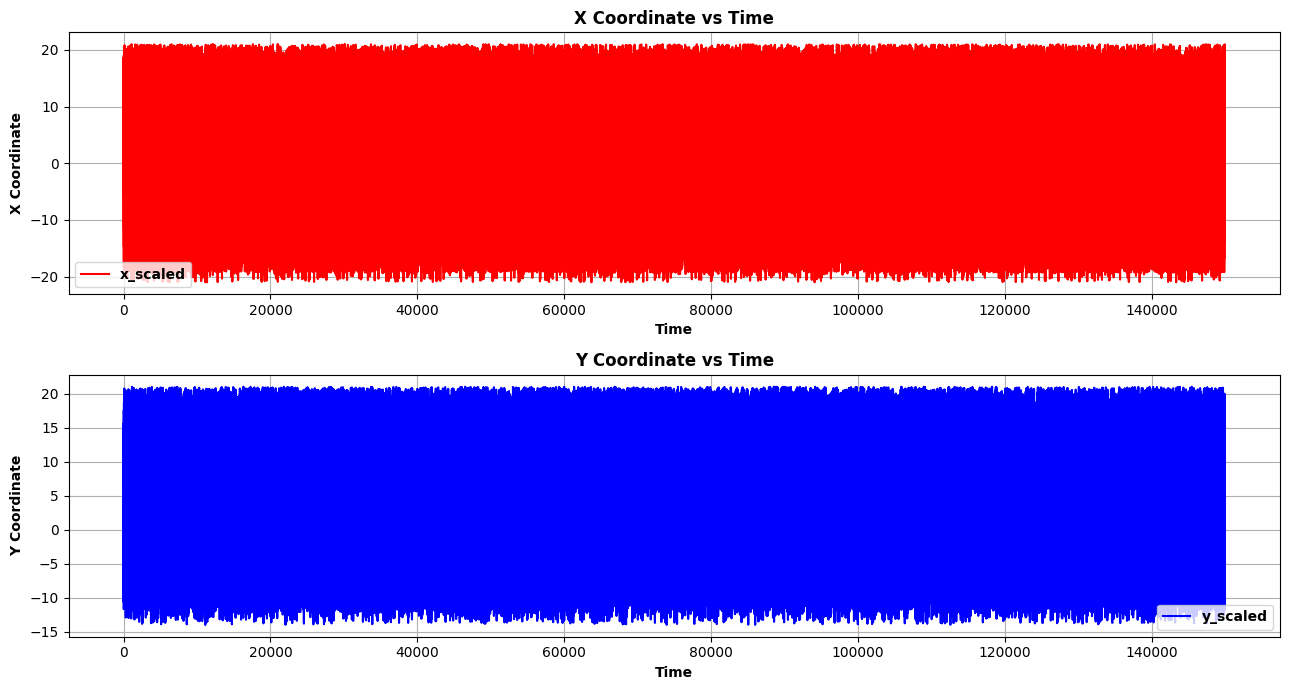

In [7]:
plot_coordinates("Three Link_Random Step Size.csv")

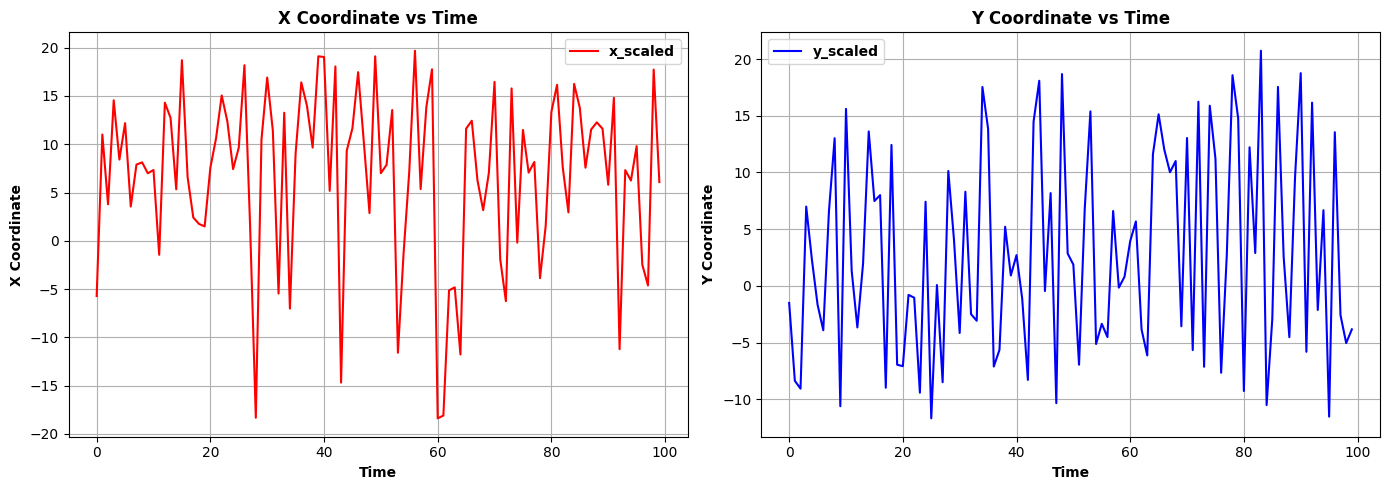

In [8]:
plot_subset_coordinates("Three Link_Random Step Size.csv")

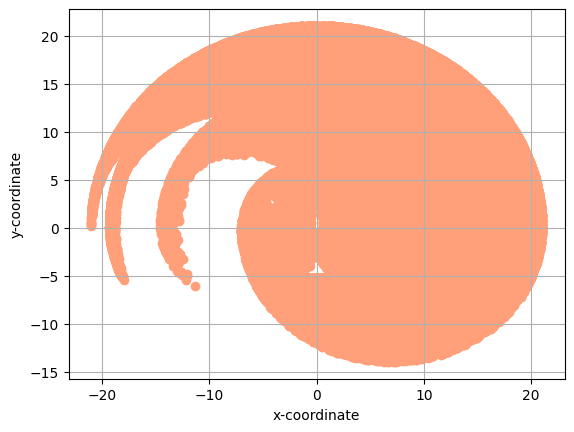

In [9]:
displayWorkSpace("Three Link_Random Step Size.csv")

In [9]:
def fixedStepSizeDataset(target_samples=150000):
    data = []
    
    individual_count = m.ceil(target_samples ** (1/3))
    
    q1_values = np.linspace(0, m.pi, individual_count)
    q2_values = np.linspace(-m.pi, 0, individual_count)
    q3_values = np.linspace(-m.pi / 2, m.pi / 2, individual_count)

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= target_samples:
                    break
            if len(data) >= target_samples:
                break
        if len(data) >= target_samples:
            break

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Fixed Step Size.csv', index=False)

fixedStepSizeDataset()

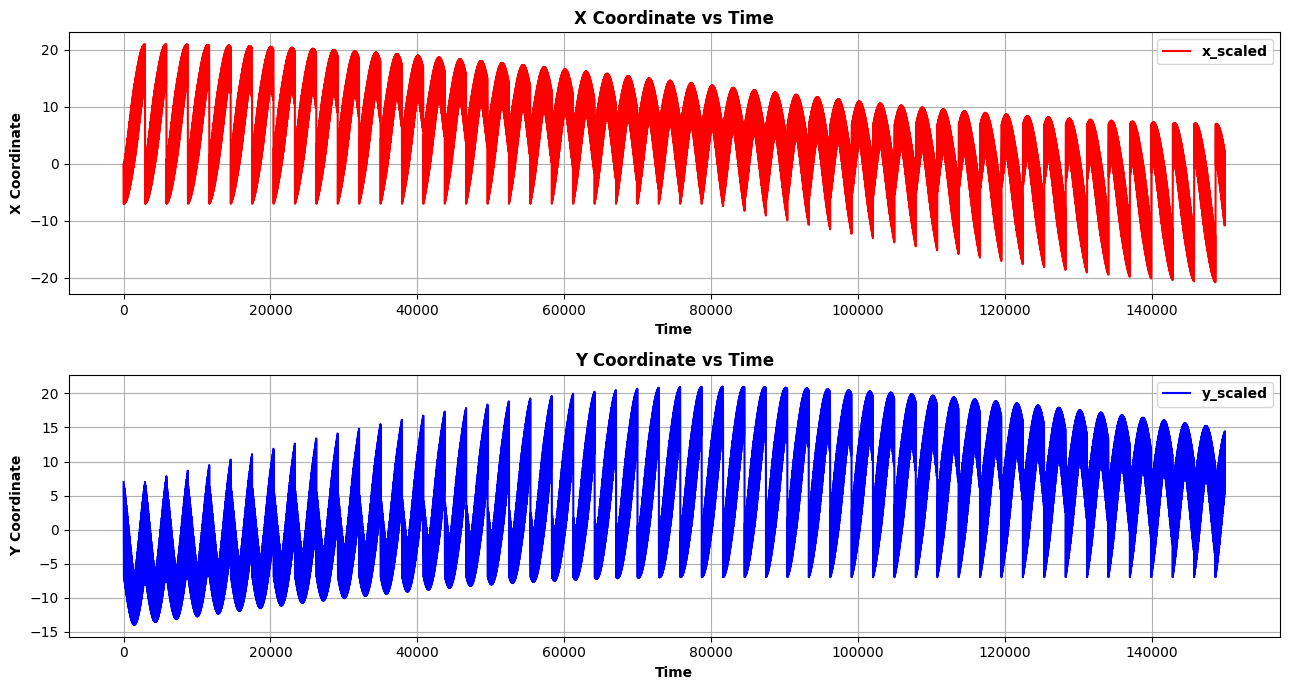

In [10]:
plot_coordinates("Three Link_Fixed Step Size.csv")

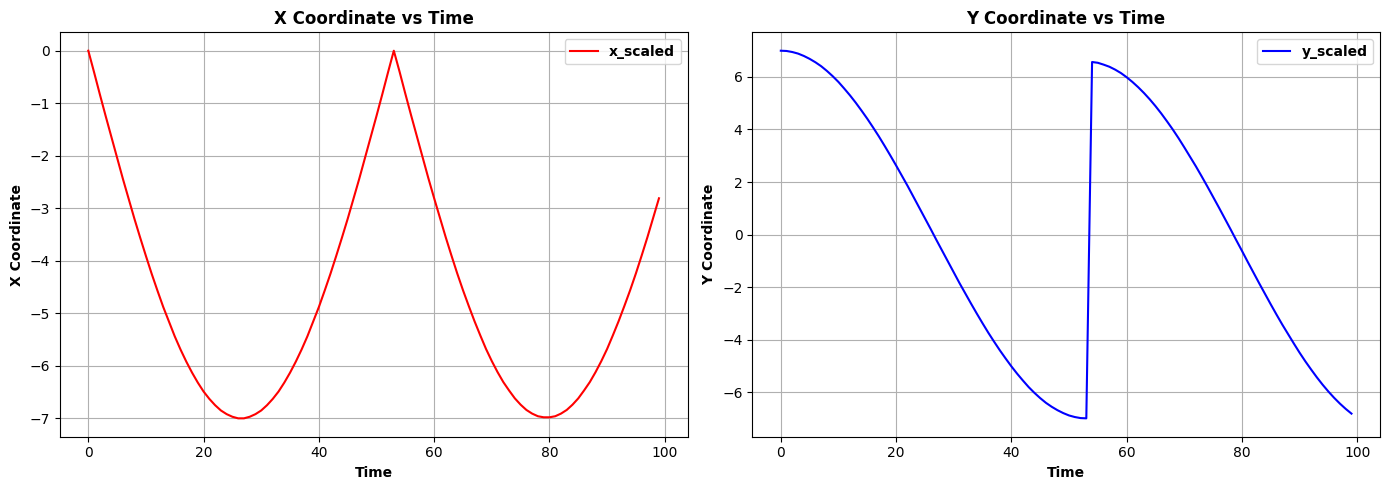

In [11]:
plot_subset_coordinates("Three Link_Fixed Step Size.csv")

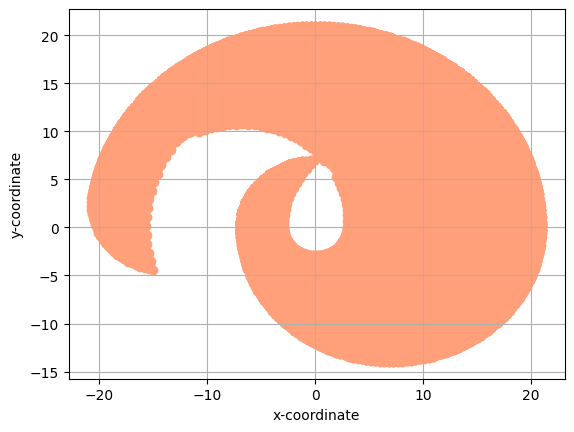

In [12]:
displayWorkSpace("Three Link_Fixed Step Size.csv")

In [13]:
def sinusoidalTrajectoryDataset(target_samples=150000):
    data = []
    individual_count = m.ceil(target_samples ** (1/3))
    t_values = np.linspace(0, 2 * m.pi, individual_count)

    q1_values = [((m.pi / 2) * (1 + m.sin(t)) / 2) for t in t_values]
    q2_values = [(-m.pi * (1 + m.sin(2 * t)) / 2) for t in t_values]
    q3_values = [((m.pi / 2) * m.sin(3 * t)) for t in t_values]

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= target_samples:
                    break
            if len(data) >= target_samples:
                break
        if len(data) >= target_samples:
            break

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Sinusoidal Trajectory.csv', index=False)

sinusoidalTrajectoryDataset()

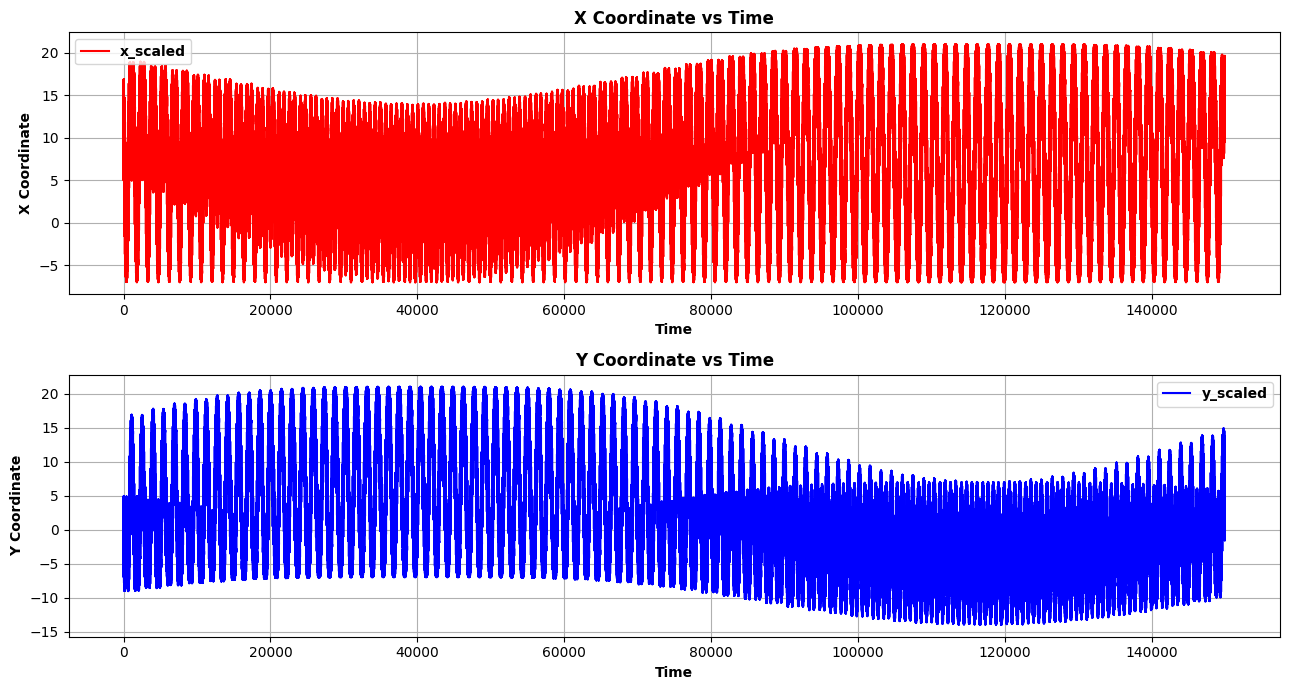

In [14]:
plot_coordinates("Three Link_Sinusoidal Trajectory.csv")

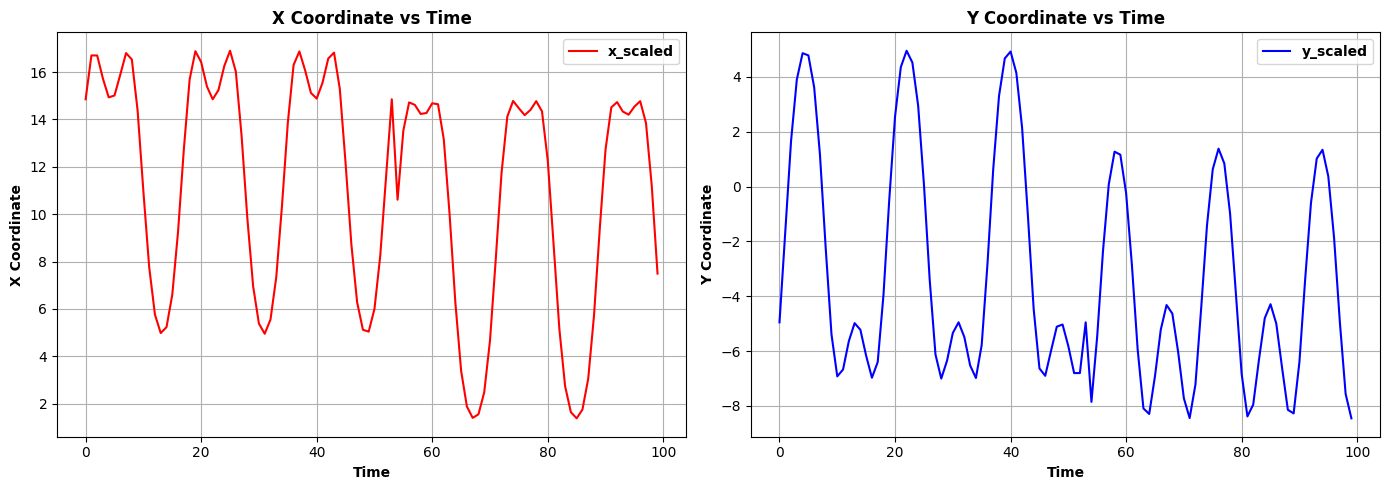

In [15]:
plot_subset_coordinates("Three Link_Sinusoidal Trajectory.csv")

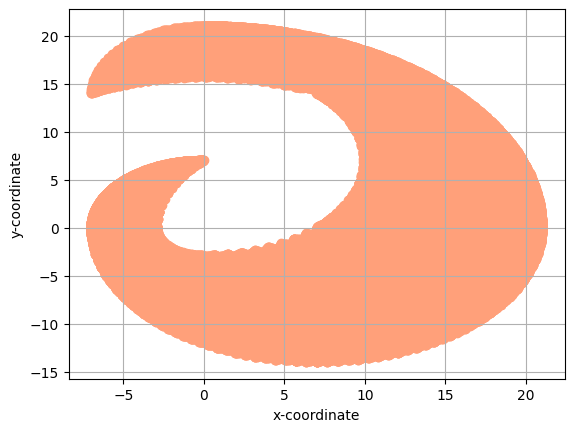

In [16]:
displayWorkSpace("Three Link_Sinusoidal Trajectory.csv")

In [10]:
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].plot(history.history['accuracy'])
    axes[0].plot(history.history['val_accuracy'])
    axes[0].set_title('Model Accuracy', weight='bold')
    axes[0].set_ylabel('Accuracy', weight='bold')
    axes[0].set_xlabel('Epoch', weight='bold')
    axes[0].legend(['Train', 'Validation'], loc='lower right', prop={'weight': 'bold'})

    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('Model Loss', weight='bold')
    axes[1].set_ylabel('Loss', weight='bold')
    axes[1].set_xlabel('Epoch', weight='bold')
    axes[1].legend(['Train', 'Validation'], loc='upper right', prop={'weight': 'bold'})

    plt.tight_layout()
    plt.show()

Models

In [ ]:
def ann(input_dim=3, output_dim=3, optimizer='adam'):
    model = Sequential([
        Dense(units=3, input_dim=input_dim, kernel_initializer='uniform'),
        Dense(units=100, kernel_initializer='uniform', activation='relu'),
        Dense(units=100, kernel_initializer='uniform', activation='relu'),
        Dense(units=output_dim, kernel_initializer='uniform', activation='linear')
    ])

    optimizers = {
        'adam': tf.keras.optimizers.Adam(learning_rate=0.001),
        'adamw': tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01),
        'adadelta': tf.keras.optimizers.Adadelta(learning_rate=1.0),
        'adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
        'sgd': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    }

    optimizer_choice = optimizers.get(optimizer.lower())

    # model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
    model.compile(optimizer=optimizer_choice, 
                  loss=tf.keras.losses.MeanSquaredError(), 
                  metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Random Sampling

In [12]:
data_Random = pd.read_csv('Three Link_Random Step Size.csv')

x_Random = data_Random.iloc[:, 0:3].values
y_Random = data_Random.iloc[:, 3:].values
x_train_Random, x_test_Random, y_train_Random, y_test_Random = train_test_split(x_Random, y_Random, test_size = 0.20)

In [13]:
ann_adam_Random = ann(optimizer='adam')
ann_adam_Random.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 100)               400       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history_ann_adam_Random = ann_adam_Random.fit(x_train_Random, y_train_Random, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1609 - accuracy: 0.9290 - val_loss: 0.0416 - val_accuracy: 0.9498
Epoch 2/150
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0321 - accuracy: 0.9628 - val_loss: 0.0309 - val_accuracy: 0.9651
Epoch 3/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0239 - accuracy: 0.9707 - val_loss: 0.0238 - val_accuracy: 0.9707
Epoch 4/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0197 - accuracy: 0.9774 - val_loss: 0.0204 - val_accuracy: 0.9749
Epoch 5/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0173 - accuracy: 0.9804 - val_loss: 0.0173 - val_accuracy: 0.9862
Epoch 6/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0159 - accuracy: 0.9815 - val_loss: 0.0152 - val_accuracy: 0.9870
Epoch 7/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0149 - accuracy: 0.9827 - val_loss: 0.0164 - v

In [94]:
test_loss_ann_adam_Random, test_acc_ann_adam_Random = ann_adam_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Random)
print('Testing Accuracy :', test_acc_ann_adam_Random)

938/938 [==============================] - 1s 1ms/step - loss: 0.0070 - accuracy: 0.9905
Testing the Model :
Testing Loss : 0.007043750025331974
Testing Accuracy : 0.9905333518981934


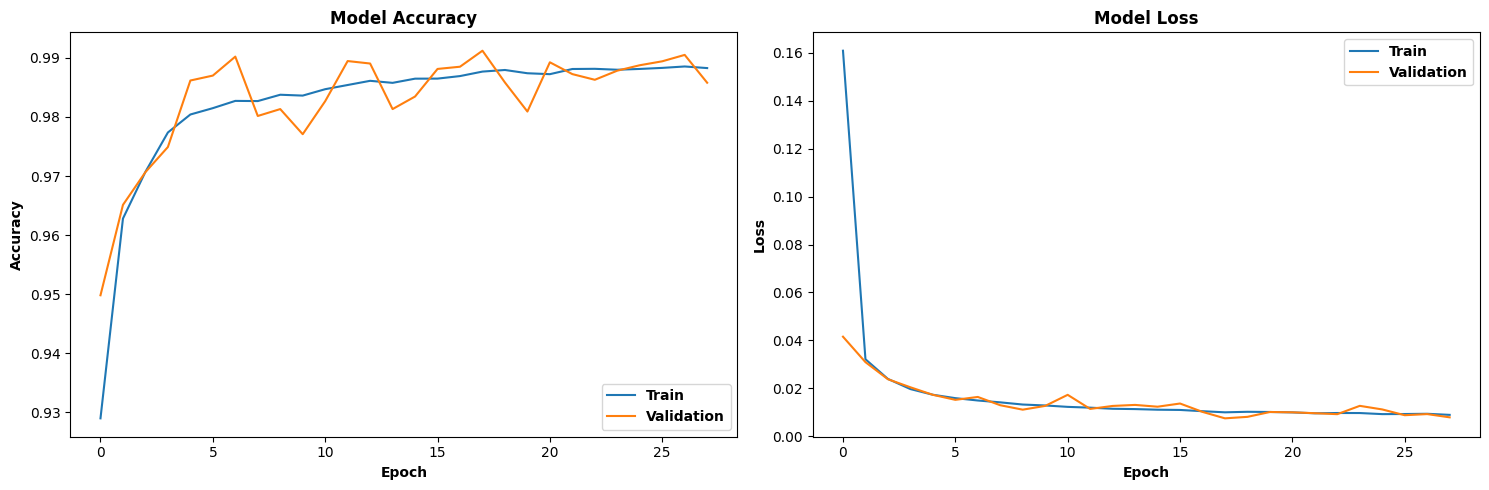

In [16]:
plot_training_history(history_ann_adam_Random)

In [17]:
ann_adamw_Random = ann(optimizer='adamw')
ann_adamw_Random.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 100)               400       
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history_ann_adamw_Random = ann_adamw_Random.fit(x_train_Random, y_train_Random, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1591 - accuracy: 0.9367 - val_loss: 0.0417 - val_accuracy: 0.9581
Epoch 2/150
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0307 - accuracy: 0.9685 - val_loss: 0.0273 - val_accuracy: 0.9690
Epoch 3/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0250 - accuracy: 0.9734 - val_loss: 0.0200 - val_accuracy: 0.9775
Epoch 4/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0211 - accuracy: 0.9737 - val_loss: 0.0305 - val_accuracy: 0.9642
Epoch 5/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0190 - accuracy: 0.9764 - val_loss: 0.0164 - val_accuracy: 0.9767
Epoch 6/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0173 - accuracy: 0.9777 - val_loss: 0.0193 - val_accuracy: 0.9778
Epoch 7/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0159 - accuracy: 0.9792 - val_loss: 0.0165 - v

In [19]:
test_loss_ann_adamw_Random, test_acc_ann_adamw_Random = ann_adamw_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Random)
print('Testing Accuracy :', test_acc_ann_adamw_Random)

938/938 [==============================] - 1s 1ms/step - loss: 0.0064 - accuracy: 0.9853
Testing the Model :
Testing Loss : 0.006428507622331381
Testing Accuracy : 0.9853333234786987


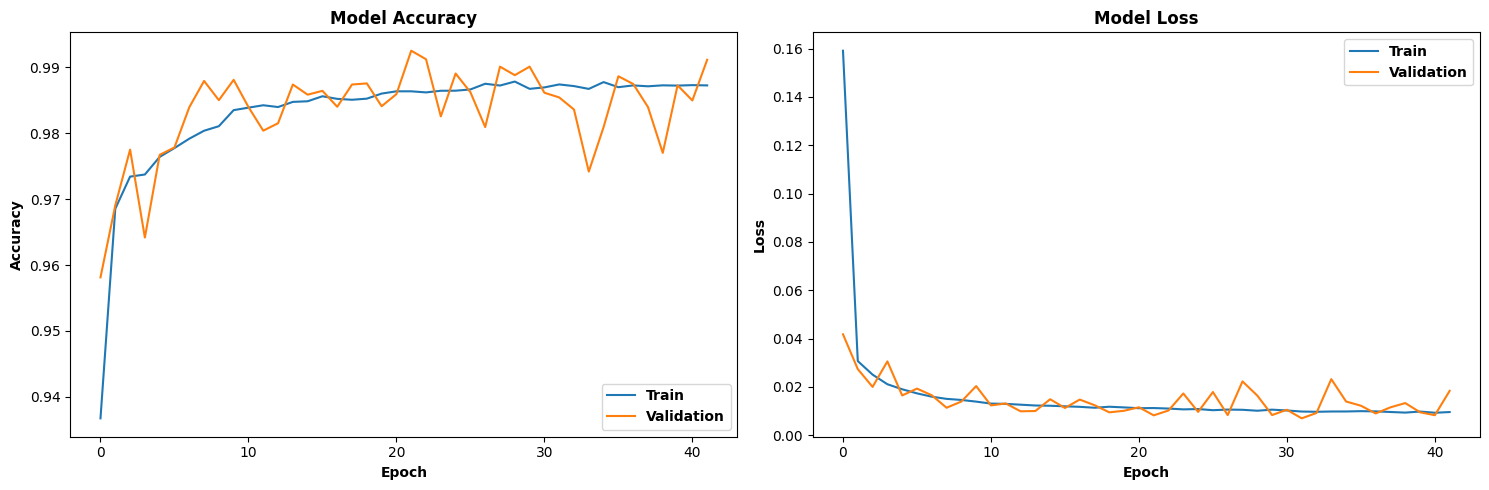

In [21]:
plot_training_history(history_ann_adamw_Random)

In [22]:
ann_adadelta_Random = ann(optimizer='adadelta')
ann_adadelta_Random.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 100)               400       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history_ann_adadelta_Random = ann_adadelta_Random.fit(x_train_Random, y_train_Random, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1177 - accuracy: 0.9521 - val_loss: 0.0265 - val_accuracy: 0.9703
Epoch 2/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0329 - accuracy: 0.9733 - val_loss: 0.0205 - val_accuracy: 0.9858
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0263 - accuracy: 0.9772 - val_loss: 0.0215 - val_accuracy: 0.9820
Epoch 4/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0227 - accuracy: 0.9794 - val_loss: 0.0263 - val_accuracy: 0.9910
Epoch 5/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0207 - accuracy: 0.9806 - val_loss: 0.0501 - val_accuracy: 0.9685
Epoch 6/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0186 - accuracy: 0.9817 - val_loss: 0.0266 - val_accuracy: 0.9736
Epoch 7/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0171 - accuracy: 0.9819 - val_loss: 0.0225 - val_ac

In [24]:
test_loss_ann_adadelta_Random, test_acc_ann_adadelta_Random = ann_adadelta_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Random)
print('Testing Accuracy :', test_acc_ann_adadelta_Random)

938/938 [==============================] - 1s 695us/step - loss: 0.0041 - accuracy: 0.9922
Testing the Model :
Testing Loss : 0.004119556862860918
Testing Accuracy : 0.9921666383743286


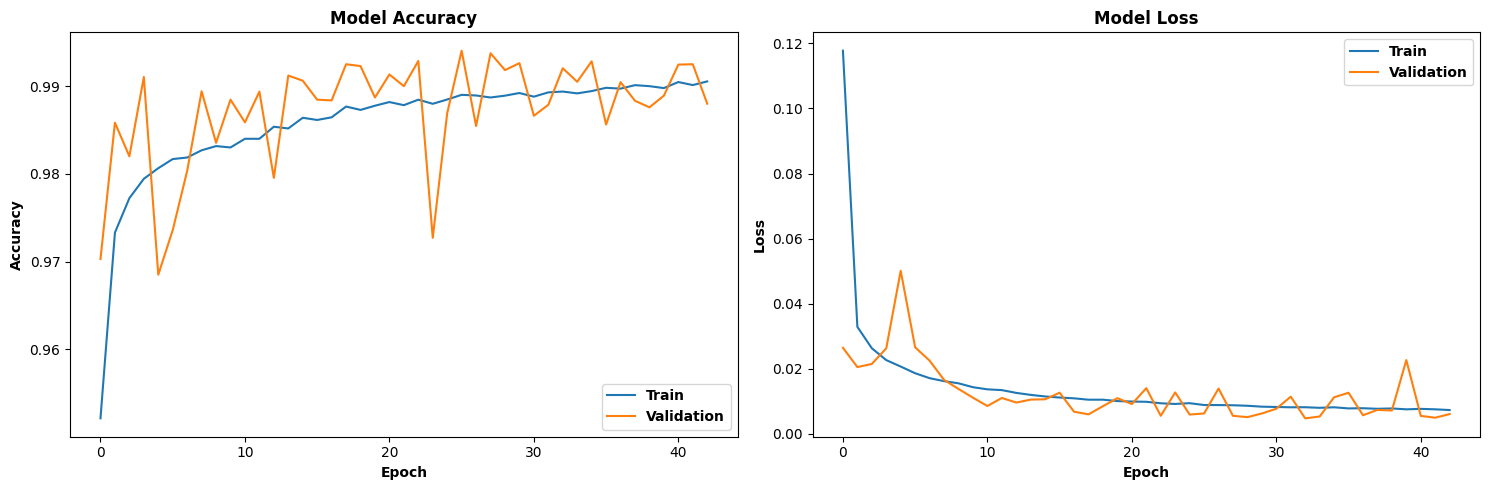

In [25]:
plot_training_history(history_ann_adadelta_Random)

In [30]:
ann_adagrad_Random = ann(optimizer='adagrad')
ann_adagrad_Random.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 12        
                                                                 
 dense_17 (Dense)            (None, 100)               400       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history_ann_adagrad_Random = ann_adagrad_Random.fit(x_train_Random, y_train_Random, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2840 - accuracy: 0.9070 - val_loss: 0.0759 - val_accuracy: 0.9301
Epoch 2/150
3000/3000 [==============================] - 3s 970us/step - loss: 0.0577 - accuracy: 0.9366 - val_loss: 0.0438 - val_accuracy: 0.9476
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0373 - accuracy: 0.9528 - val_loss: 0.0338 - val_accuracy: 0.9592
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0302 - accuracy: 0.9608 - val_loss: 0.0294 - val_accuracy: 0.9664
Epoch 5/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0262 - accuracy: 0.9656 - val_loss: 0.0256 - val_accuracy: 0.9699
Epoch 6/150
3000/3000 [==============================] - 3s 995us/step - loss: 0.0236 - accuracy: 0.9685 - val_loss: 0.0230 - val_accuracy: 0.9722
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0214 - accuracy: 0.9704 - val_loss: 0.0210 - va

In [32]:
test_loss_ann_adagrad_Random, test_acc_ann_adagrad_Random = ann_adagrad_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Random)
print('Testing Accuracy :', test_acc_ann_adagrad_Random)

938/938 [==============================] - 1s 664us/step - loss: 0.0045 - accuracy: 0.9919
Testing the Model :
Testing Loss : 0.004507447127252817
Testing Accuracy : 0.9919000267982483


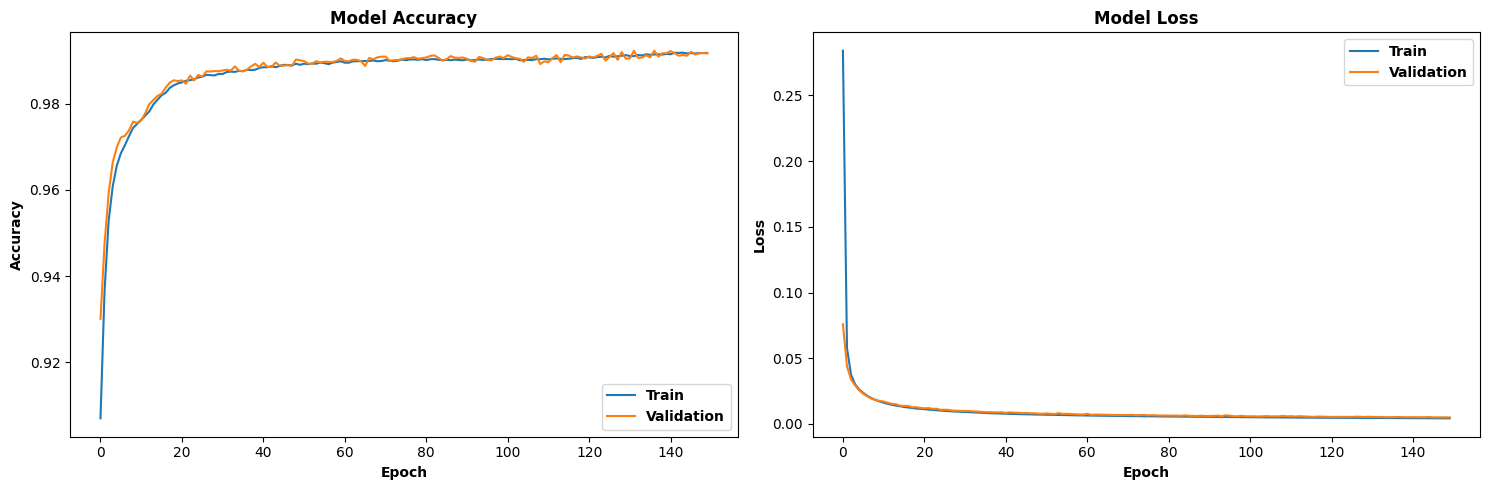

In [33]:
plot_training_history(history_ann_adagrad_Random)

In [26]:
ann_rmsprop_Random = ann(optimizer='rmsprop')
ann_rmsprop_Random.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 100)               400       
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
history_ann_rmsprop_Random = ann_rmsprop_Random.fit(x_train_Random, y_train_Random, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1373 - accuracy: 0.9364 - val_loss: 0.0460 - val_accuracy: 0.9607
Epoch 2/150
3000/3000 [==============================] - 3s 973us/step - loss: 0.0433 - accuracy: 0.9669 - val_loss: 0.0513 - val_accuracy: 0.9680
Epoch 3/150
3000/3000 [==============================] - 3s 984us/step - loss: 0.0353 - accuracy: 0.9752 - val_loss: 0.0224 - val_accuracy: 0.9775
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0311 - accuracy: 0.9771 - val_loss: 0.0280 - val_accuracy: 0.9730
Epoch 5/150
3000/3000 [==============================] - 3s 972us/step - loss: 0.0278 - accuracy: 0.9792 - val_loss: 0.0165 - val_accuracy: 0.9830
Epoch 6/150
3000/3000 [==============================] - 3s 983us/step - loss: 0.0250 - accuracy: 0.9798 - val_loss: 0.0198 - val_accuracy: 0.9820
Epoch 7/150
3000/3000 [==============================] - 3s 997us/step - loss: 0.0234 - accuracy: 0.9811 - val_loss: 0.015

In [28]:
test_loss_ann_rmsprop_Random, test_acc_ann_rmsprop_Random = ann_rmsprop_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Random)
print('Testing Accuracy :', test_acc_ann_rmsprop_Random)

938/938 [==============================] - 1s 704us/step - loss: 0.0078 - accuracy: 0.9908
Testing the Model :
Testing Loss : 0.007820729166269302
Testing Accuracy : 0.9907666444778442


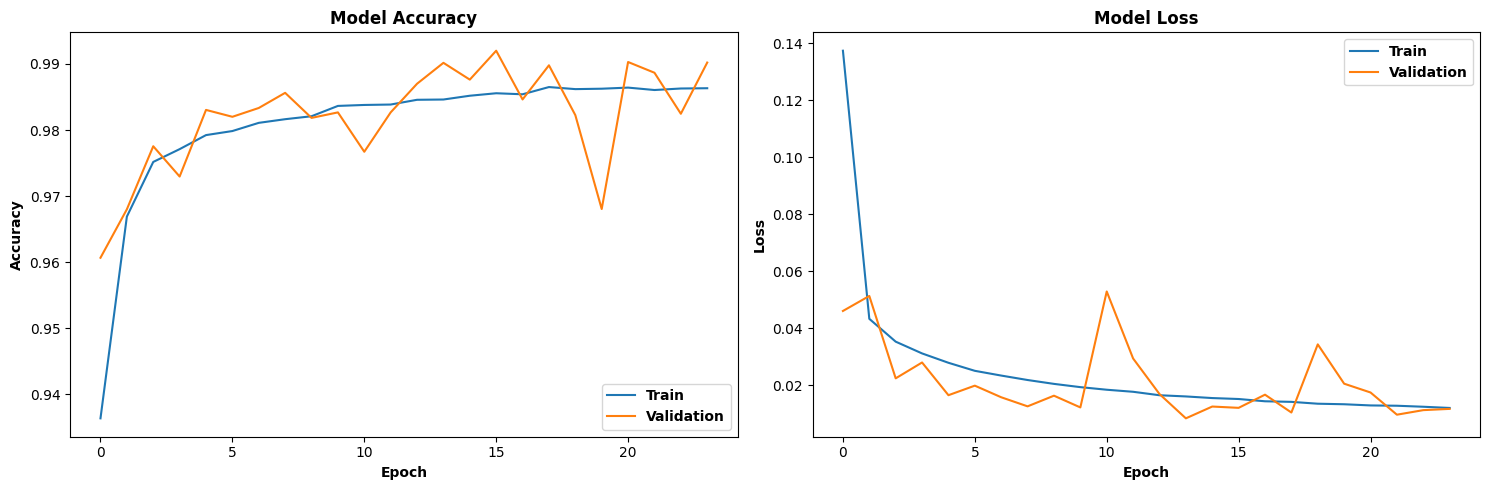

In [29]:
plot_training_history(history_ann_rmsprop_Random)

In [34]:
ann_sgd_Random = ann(optimizer='sgd')
ann_sgd_Random.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3)                 12        
                                                                 
 dense_21 (Dense)            (None, 100)               400       
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history_ann_sgd_Random = ann_sgd_Random.fit(x_train_Random, y_train_Random, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1765 - accuracy: 0.9232 - val_loss: 0.0799 - val_accuracy: 0.9465
Epoch 2/150
3000/3000 [==============================] - 3s 993us/step - loss: 0.0709 - accuracy: 0.9473 - val_loss: 0.0637 - val_accuracy: 0.9403
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0608 - accuracy: 0.9548 - val_loss: 0.0584 - val_accuracy: 0.9648
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0581 - accuracy: 0.9566 - val_loss: 0.0404 - val_accuracy: 0.9672
Epoch 5/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0507 - accuracy: 0.9619 - val_loss: 0.0384 - val_accuracy: 0.9635
Epoch 6/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0491 - accuracy: 0.9629 - val_loss: 0.0738 - val_accuracy: 0.9706
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0439 - accuracy: 0.9638 - val_loss: 0.0370 - val_

In [36]:
test_loss_ann_sgd_Random, test_acc_ann_sgd_Random = ann_sgd_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Random)
print('Testing Accuracy :', test_acc_ann_sgd_Random)

938/938 [==============================] - 1s 747us/step - loss: 0.0153 - accuracy: 0.9796
Testing the Model :
Testing Loss : 0.015289421193301678
Testing Accuracy : 0.9795666933059692


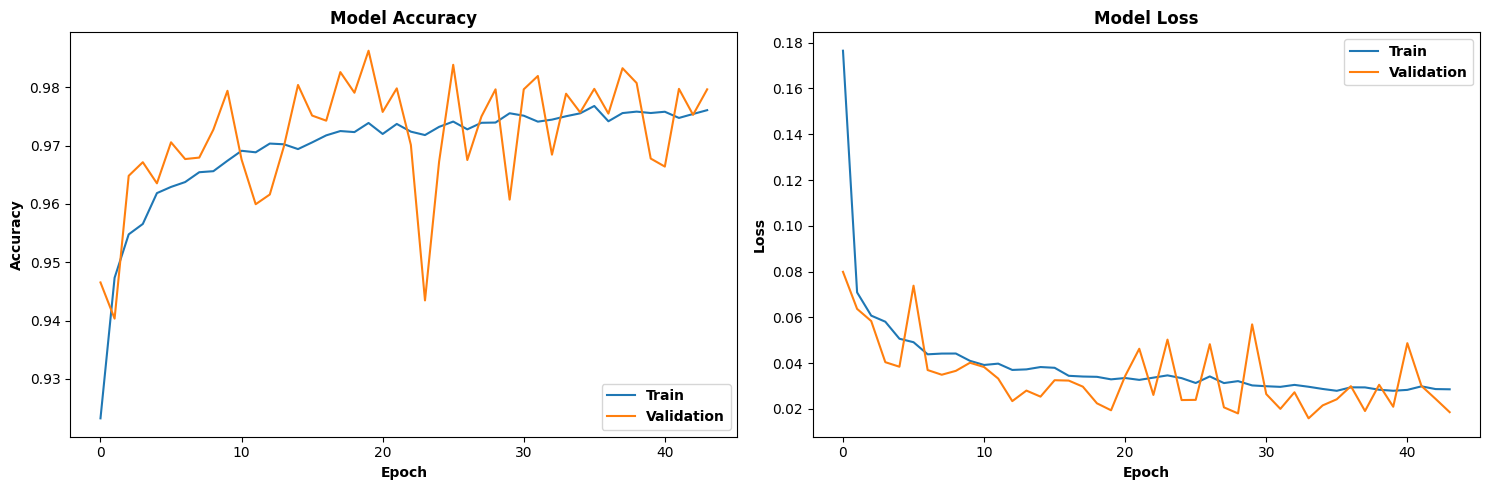

In [37]:
plot_training_history(history_ann_sgd_Random)

Fixed Step Size

In [38]:
data_Fixed = pd.read_csv('Three Link_Fixed Step Size.csv')

x_Fixed = data_Fixed.iloc[:, 0:3].values
y_Fixed = data_Fixed.iloc[:, 3:].values
x_train_Fixed, x_test_Fixed, y_train_Fixed, y_test_Fixed = train_test_split(x_Fixed, y_Fixed, test_size = 0.20)

In [39]:
ann_adam_Fixed = ann(optimizer='adam')
ann_adam_Fixed.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 100)               400       
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history_ann_adam_Fixed = ann_adam_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1623 - accuracy: 0.9361 - val_loss: 0.0350 - val_accuracy: 0.9652
Epoch 2/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0325 - accuracy: 0.9681 - val_loss: 0.0391 - val_accuracy: 0.9541
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0267 - accuracy: 0.9722 - val_loss: 0.0261 - val_accuracy: 0.9718
Epoch 4/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0233 - accuracy: 0.9750 - val_loss: 0.0188 - val_accuracy: 0.9772
Epoch 5/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0212 - accuracy: 0.9766 - val_loss: 0.0257 - val_accuracy: 0.9697
Epoch 6/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0197 - accuracy: 0.9777 - val_loss: 0.0200 - val_accuracy: 0.9637
Epoch 7/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0195 - accuracy: 0.9790 - val_loss: 0.0338 - val_ac

In [41]:
test_loss_ann_adam_Fixed, test_acc_ann_adam_Fixed = ann_adam_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Fixed)
print('Testing Accuracy :', test_acc_ann_adam_Fixed)

938/938 [==============================] - 1s 718us/step - loss: 0.0105 - accuracy: 0.9858
Testing the Model :
Testing Loss : 0.010540856048464775
Testing Accuracy : 0.9857666492462158


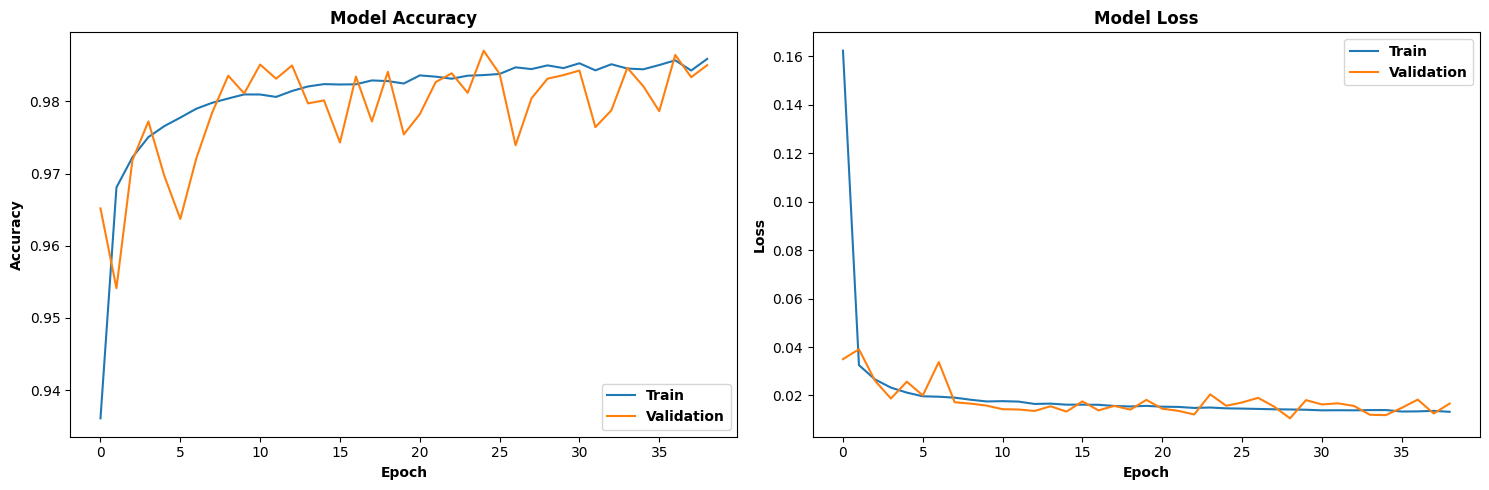

In [42]:
plot_training_history(history_ann_adam_Fixed)

In [43]:
ann_adamw_Fixed = ann(optimizer='adamw')
ann_adamw_Fixed.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 3)                 12        
                                                                 
 dense_29 (Dense)            (None, 100)               400       
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history_ann_adamw_Fixed = ann_adamw_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1748 - accuracy: 0.9317 - val_loss: 0.0467 - val_accuracy: 0.9568
Epoch 2/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0390 - accuracy: 0.9627 - val_loss: 0.0330 - val_accuracy: 0.9643
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0316 - accuracy: 0.9687 - val_loss: 0.0277 - val_accuracy: 0.9682
Epoch 4/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0275 - accuracy: 0.9729 - val_loss: 0.0226 - val_accuracy: 0.9758
Epoch 5/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0257 - accuracy: 0.9748 - val_loss: 0.0223 - val_accuracy: 0.9747
Epoch 6/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0238 - accuracy: 0.9760 - val_loss: 0.0208 - val_accuracy: 0.9714
Epoch 7/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0229 - accuracy: 0.9770 - val_loss: 0.0244 - val_ac

In [45]:
test_loss_ann_adamw_Fixed, test_acc_ann_adamw_Fixed = ann_adamw_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Fixed)
print('Testing Accuracy :', test_acc_ann_adamw_Fixed)

938/938 [==============================] - 1s 705us/step - loss: 0.0121 - accuracy: 0.9888
Testing the Model :
Testing Loss : 0.012073944322764874
Testing Accuracy : 0.9887999892234802


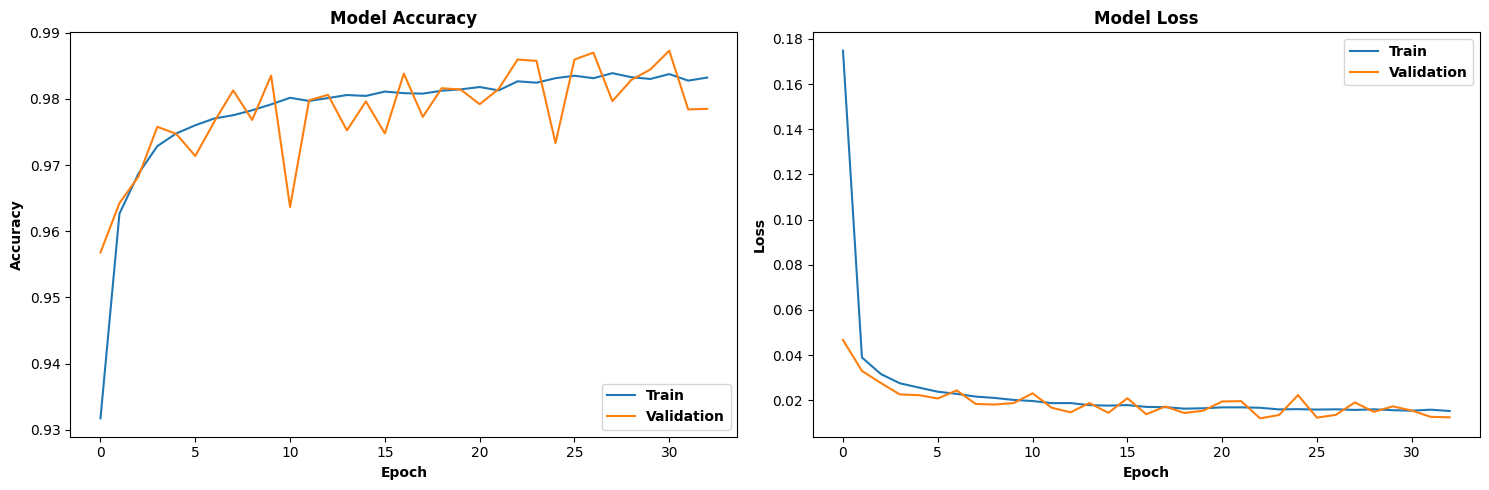

In [46]:
plot_training_history(history_ann_adamw_Fixed)

In [48]:
ann_adadelta_Fixed = ann(optimizer='adadelta')
ann_adadelta_Fixed.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 3)                 12        
                                                                 
 dense_37 (Dense)            (None, 100)               400       
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
history_ann_adadelta_Fixed = ann_adadelta_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1223 - accuracy: 0.9482 - val_loss: 0.0528 - val_accuracy: 0.9732
Epoch 2/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0379 - accuracy: 0.9731 - val_loss: 0.0282 - val_accuracy: 0.9677
Epoch 3/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0313 - accuracy: 0.9763 - val_loss: 0.0239 - val_accuracy: 0.9776
Epoch 4/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0273 - accuracy: 0.9788 - val_loss: 0.0397 - val_accuracy: 0.9722
Epoch 5/150
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0253 - accuracy: 0.9787 - val_loss: 0.0429 - val_accuracy: 0.9749
Epoch 6/150
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0244 - accuracy: 0.9801 - val_loss: 0.0226 - val_accuracy: 0.9795
Epoch 7/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0231 - accuracy: 0.9811 - val_loss: 0.0156 - val_ac

In [50]:
test_loss_ann_adadelta_Fixed, test_acc_ann_adadelta_Fixed = ann_adadelta_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Fixed)
print('Testing Accuracy :', test_acc_ann_adadelta_Fixed)

938/938 [==============================] - 1s 723us/step - loss: 0.0125 - accuracy: 0.9860
Testing the Model :
Testing Loss : 0.012511221691966057
Testing Accuracy : 0.985966682434082


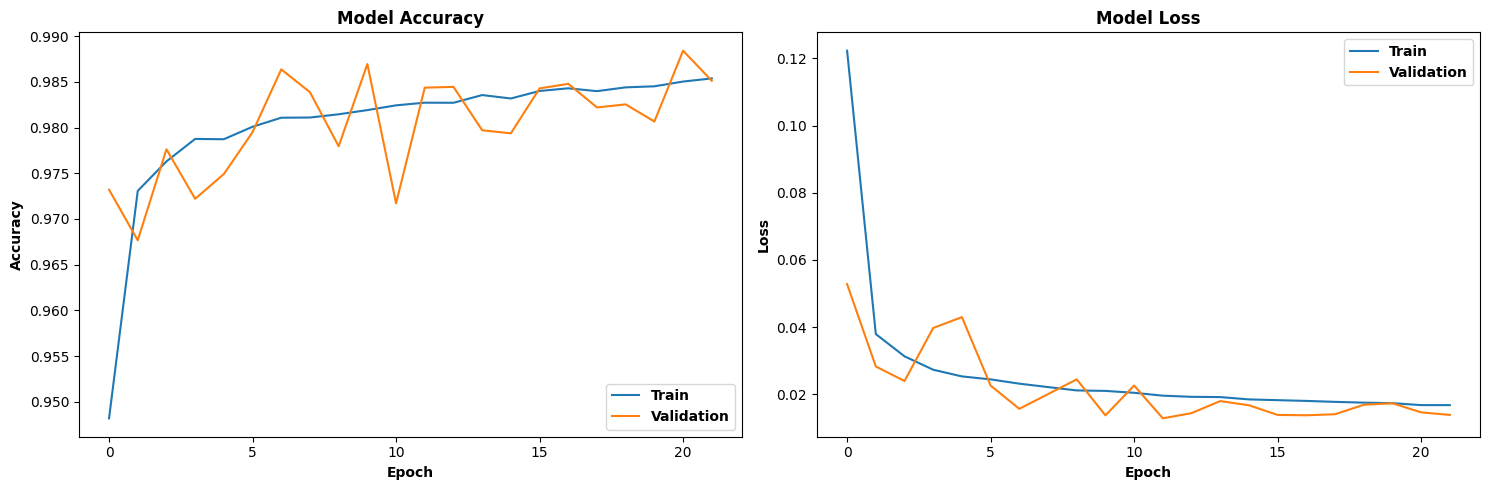

In [51]:
plot_training_history(history_ann_adadelta_Fixed)

In [52]:
ann_adagrad_Fixed = ann(optimizer='adagrad')
ann_adagrad_Fixed.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 3)                 12        
                                                                 
 dense_41 (Dense)            (None, 100)               400       
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                                 
 dense_43 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
history_ann_adagrad_Fixed = ann_adagrad_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.3362 - accuracy: 0.8924 - val_loss: 0.0840 - val_accuracy: 0.9260
Epoch 2/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0625 - accuracy: 0.9418 - val_loss: 0.0510 - val_accuracy: 0.9508
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0440 - accuracy: 0.9566 - val_loss: 0.0396 - val_accuracy: 0.9592
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0357 - accuracy: 0.9656 - val_loss: 0.0336 - val_accuracy: 0.9685
Epoch 5/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0306 - accuracy: 0.9718 - val_loss: 0.0287 - val_accuracy: 0.9695
Epoch 6/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0271 - accuracy: 0.9744 - val_loss: 0.0275 - val_accuracy: 0.9727
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0247 - accuracy: 0.9764 - val_loss: 0.0238 - val_ac

In [54]:
test_loss_ann_adagrad_Fixed, test_acc_ann_adagrad_Fixed = ann_adagrad_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Fixed)
print('Testing Accuracy :', test_acc_ann_adagrad_Fixed)

938/938 [==============================] - 1s 730us/step - loss: 0.0084 - accuracy: 0.9911
Testing the Model :
Testing Loss : 0.008436868898570538
Testing Accuracy : 0.991100013256073


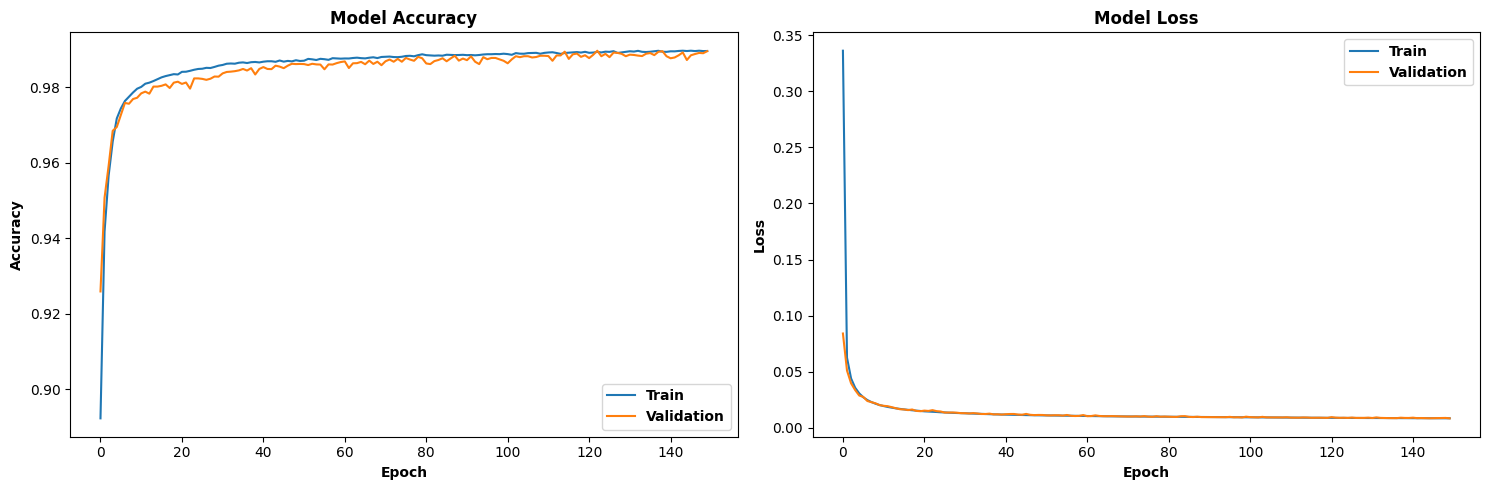

In [55]:
plot_training_history(history_ann_adagrad_Fixed)

In [56]:
ann_rmsprop_Fixed = ann(optimizer='rmsprop')
ann_rmsprop_Fixed.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 3)                 12        
                                                                 
 dense_45 (Dense)            (None, 100)               400       
                                                                 
 dense_46 (Dense)            (None, 100)               10100     
                                                                 
 dense_47 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
history_ann_rmsprop_Fixed = ann_rmsprop_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1490 - accuracy: 0.9395 - val_loss: 0.0914 - val_accuracy: 0.9566
Epoch 2/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0467 - accuracy: 0.9681 - val_loss: 0.0325 - val_accuracy: 0.9722
Epoch 3/150
3000/3000 [==============================] - 3s 988us/step - loss: 0.0395 - accuracy: 0.9717 - val_loss: 0.0507 - val_accuracy: 0.9711
Epoch 4/150
3000/3000 [==============================] - 3s 984us/step - loss: 0.0352 - accuracy: 0.9736 - val_loss: 0.0545 - val_accuracy: 0.9648
Epoch 5/150
3000/3000 [==============================] - 3s 995us/step - loss: 0.0318 - accuracy: 0.9748 - val_loss: 0.0269 - val_accuracy: 0.9746
Epoch 6/150
3000/3000 [==============================] - 3s 976us/step - loss: 0.0301 - accuracy: 0.9769 - val_loss: 0.0289 - val_accuracy: 0.9737
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0284 - accuracy: 0.9772 - val_loss: 0.0229 

In [58]:
test_loss_ann_rmsprop_Fixed, test_acc_ann_rmsprop_Fixed = ann_rmsprop_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Fixed)
print('Testing Accuracy :', test_acc_ann_rmsprop_Fixed)

938/938 [==============================] - 1s 716us/step - loss: 0.0130 - accuracy: 0.9888
Testing the Model :
Testing Loss : 0.012973534874618053
Testing Accuracy : 0.9888333082199097


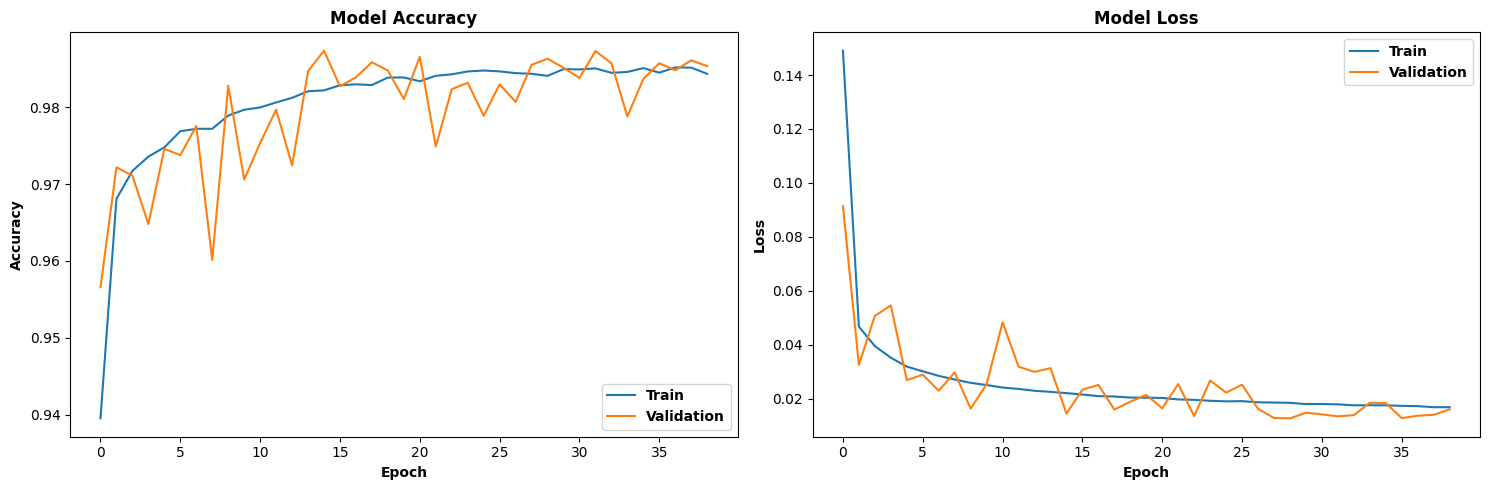

In [59]:
plot_training_history(history_ann_rmsprop_Fixed)

In [60]:
ann_sgd_Fixed = ann(optimizer='sgd')
ann_sgd_Fixed.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 3)                 12        
                                                                 
 dense_49 (Dense)            (None, 100)               400       
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dense_51 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
history_ann_sgd_Fixed = ann_sgd_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1852 - accuracy: 0.9189 - val_loss: 0.0507 - val_accuracy: 0.9513
Epoch 2/150
3000/3000 [==============================] - 3s 997us/step - loss: 0.0740 - accuracy: 0.9497 - val_loss: 0.0873 - val_accuracy: 0.9631
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0658 - accuracy: 0.9551 - val_loss: 0.1055 - val_accuracy: 0.9422
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0627 - accuracy: 0.9579 - val_loss: 0.0443 - val_accuracy: 0.9591
Epoch 5/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0586 - accuracy: 0.9603 - val_loss: 0.0546 - val_accuracy: 0.9574
Epoch 6/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0567 - accuracy: 0.9603 - val_loss: 0.0682 - val_accuracy: 0.9428
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0547 - accuracy: 0.9617 - val_loss: 0.0524 - val_

In [62]:
test_loss_ann_sgd_Fixed, test_acc_ann_sgd_Fixed = ann_sgd_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Fixed)
print('Testing Accuracy :', test_acc_ann_sgd_Fixed)

938/938 [==============================] - 1s 927us/step - loss: 0.0440 - accuracy: 0.9617
Testing the Model :
Testing Loss : 0.044030092656612396
Testing Accuracy : 0.9617000222206116


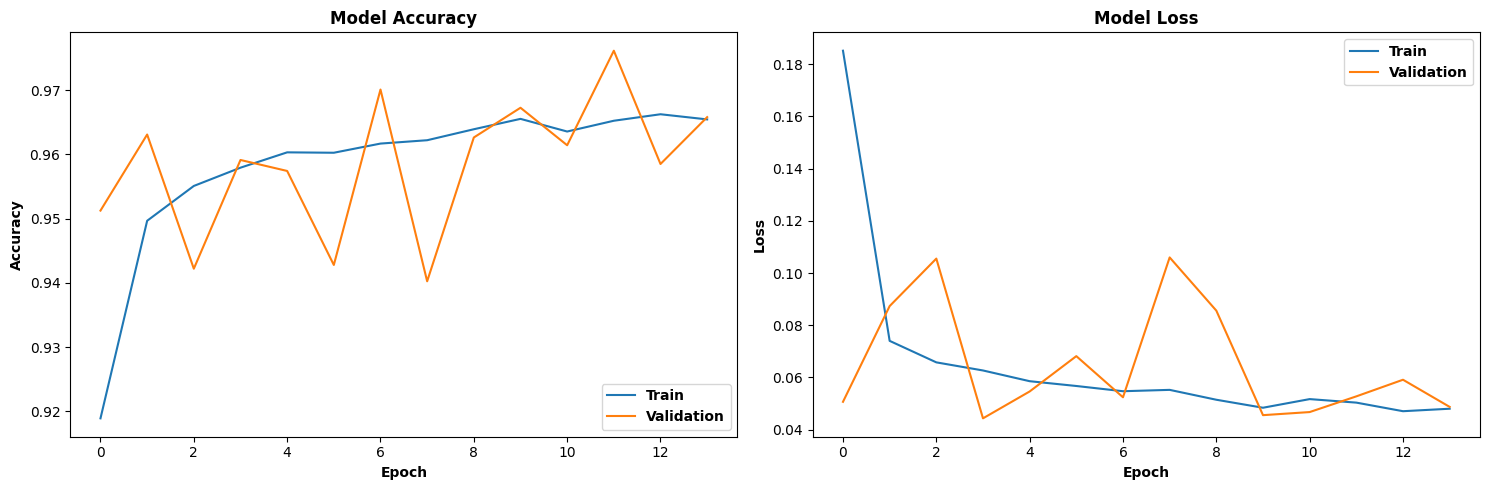

In [63]:
plot_training_history(history_ann_sgd_Fixed)

Sinusoidal Trajectory

In [64]:
data_Sinusoidal = pd.read_csv('Three Link_Sinusoidal Trajectory.csv')

x_Sinusoidal = data_Sinusoidal.iloc[:, 0:3].values
y_Sinusoidal = data_Sinusoidal.iloc[:, 3:].values
x_train_Sinusoidal, x_test_Sinusoidal, y_train_Sinusoidal, y_test_Sinusoidal = train_test_split(x_Sinusoidal, y_Sinusoidal, test_size = 0.20)

In [65]:
ann_adam_Sinusoidal = ann(optimizer='adam')
ann_adam_Sinusoidal.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 3)                 12        
                                                                 
 dense_53 (Dense)            (None, 100)               400       
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
history_ann_adam_Sinusoidal = ann_adam_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1138 - accuracy: 0.9022 - val_loss: 0.0323 - val_accuracy: 0.9402
Epoch 2/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0331 - accuracy: 0.9385 - val_loss: 0.0268 - val_accuracy: 0.9463
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0279 - accuracy: 0.9424 - val_loss: 0.0308 - val_accuracy: 0.9216
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0259 - accuracy: 0.9443 - val_loss: 0.0255 - val_accuracy: 0.9487
Epoch 5/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0251 - accuracy: 0.9449 - val_loss: 0.0314 - val_accuracy: 0.9335
Epoch 6/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0238 - accuracy: 0.9480 - val_loss: 0.0220 - val_accuracy: 0.9595
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0235 - accuracy: 0.9487 - val_loss: 0.0204 - val_ac

In [67]:
test_loss_ann_adam_Sinusoidal, test_acc_ann_adam_Sinusoidal = ann_adam_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adam_Sinusoidal)

938/938 [==============================] - 1s 690us/step - loss: 0.0148 - accuracy: 0.9668
Testing the Model :
Testing Loss : 0.014775246381759644
Testing Accuracy : 0.9668333530426025


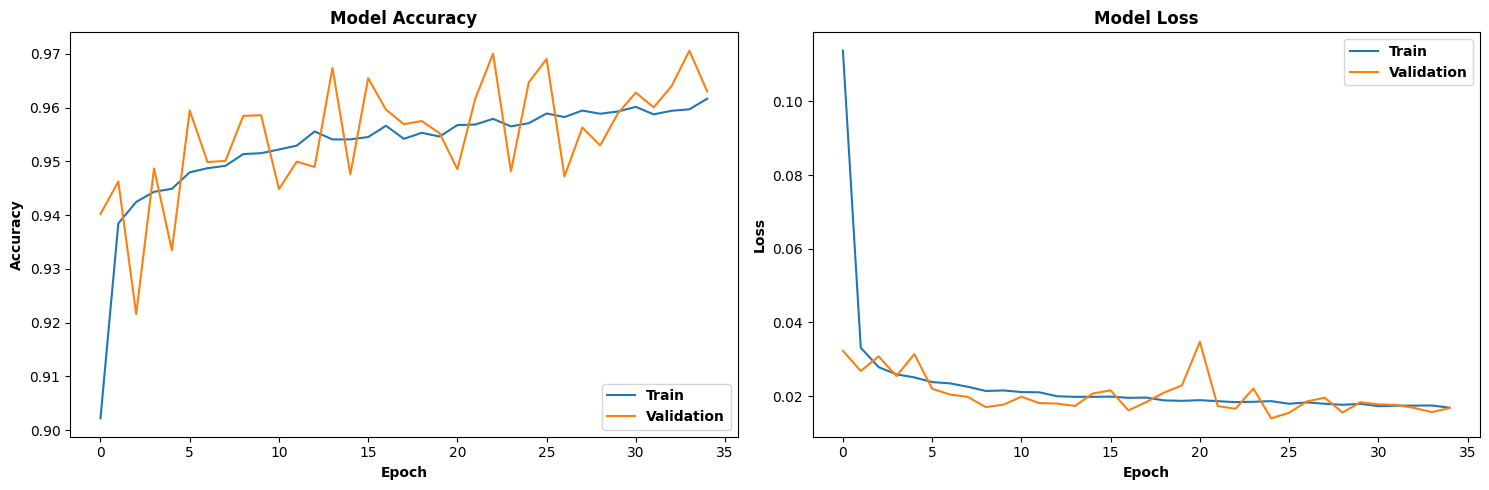

In [68]:
plot_training_history(history_ann_adam_Sinusoidal)

In [69]:
ann_adamw_Sinusoidal = ann(optimizer='adamw')
ann_adamw_Sinusoidal.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 3)                 12        
                                                                 
 dense_57 (Dense)            (None, 100)               400       
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
history_ann_adamw_Sinusoidal = ann_adamw_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1187 - accuracy: 0.8973 - val_loss: 0.0371 - val_accuracy: 0.9320
Epoch 2/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0315 - accuracy: 0.9352 - val_loss: 0.0236 - val_accuracy: 0.9484
Epoch 3/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0273 - accuracy: 0.9419 - val_loss: 0.0245 - val_accuracy: 0.9377
Epoch 4/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0261 - accuracy: 0.9425 - val_loss: 0.0258 - val_accuracy: 0.9326
Epoch 5/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0248 - accuracy: 0.9434 - val_loss: 0.0213 - val_accuracy: 0.9450
Epoch 6/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0244 - accuracy: 0.9439 - val_loss: 0.0260 - val_accuracy: 0.9440
Epoch 7/150
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0240 - accuracy: 0.9468 - val_loss: 0.0237 - val_ac

In [71]:
test_loss_ann_adamw_Sinusoidal, test_acc_ann_adamw_Sinusoidal = ann_adamw_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adamw_Sinusoidal)

938/938 [==============================] - 1s 1ms/step - loss: 0.0153 - accuracy: 0.9706
Testing the Model :
Testing Loss : 0.015334771946072578
Testing Accuracy : 0.9706000089645386


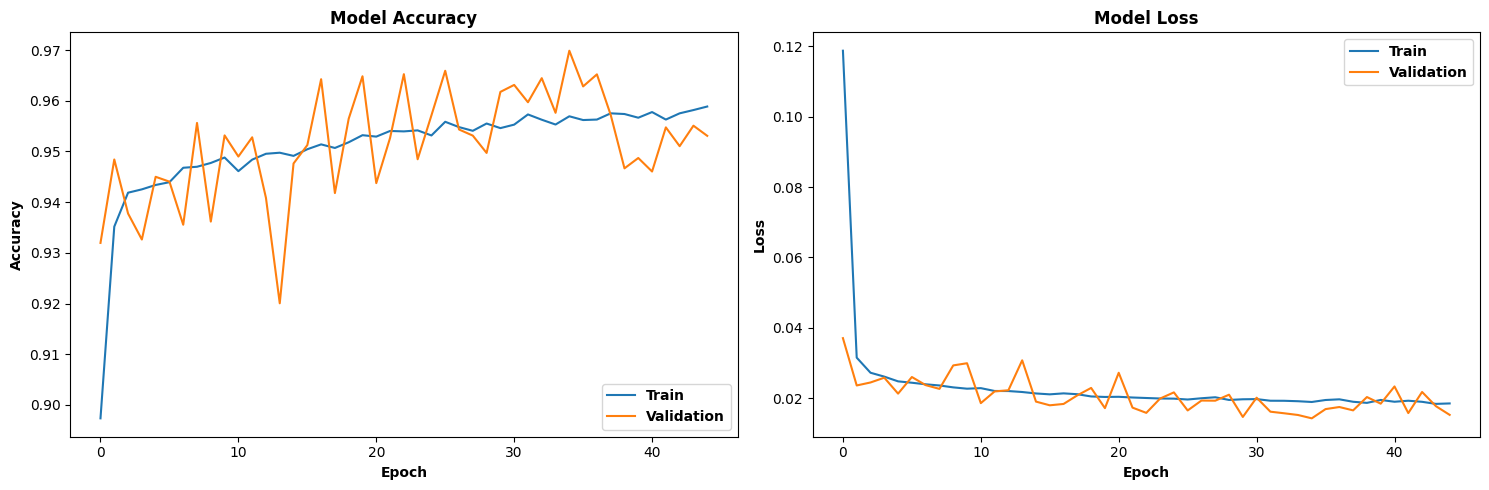

In [72]:
plot_training_history(history_ann_adamw_Sinusoidal)

In [73]:
ann_adadelta_Sinusoidal = ann(optimizer='adadelta')
ann_adadelta_Sinusoidal.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 3)                 12        
                                                                 
 dense_61 (Dense)            (None, 100)               400       
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 dense_63 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history_ann_adadelta_Sinusoidal = ann_adadelta_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 5s 1ms/step - loss: 0.1027 - accuracy: 0.9109 - val_loss: 0.0308 - val_accuracy: 0.9383
Epoch 2/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0374 - accuracy: 0.9404 - val_loss: 0.0299 - val_accuracy: 0.9516
Epoch 3/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0329 - accuracy: 0.9436 - val_loss: 0.0408 - val_accuracy: 0.9411
Epoch 4/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0306 - accuracy: 0.9478 - val_loss: 0.0325 - val_accuracy: 0.9401
Epoch 5/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0290 - accuracy: 0.9483 - val_loss: 0.0199 - val_accuracy: 0.9585
Epoch 6/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0279 - accuracy: 0.9508 - val_loss: 0.0278 - val_accuracy: 0.9482
Epoch 7/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0268 - accuracy: 0.9512 - val_loss: 0.0269 - val_ac

In [75]:
test_loss_ann_adadelta_Sinusoidal, test_acc_ann_adadelta_Sinusoidal = ann_adadelta_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adadelta_Sinusoidal)

938/938 [==============================] - 1s 993us/step - loss: 0.0162 - accuracy: 0.9658
Testing the Model :
Testing Loss : 0.016171464696526527
Testing Accuracy : 0.965833306312561


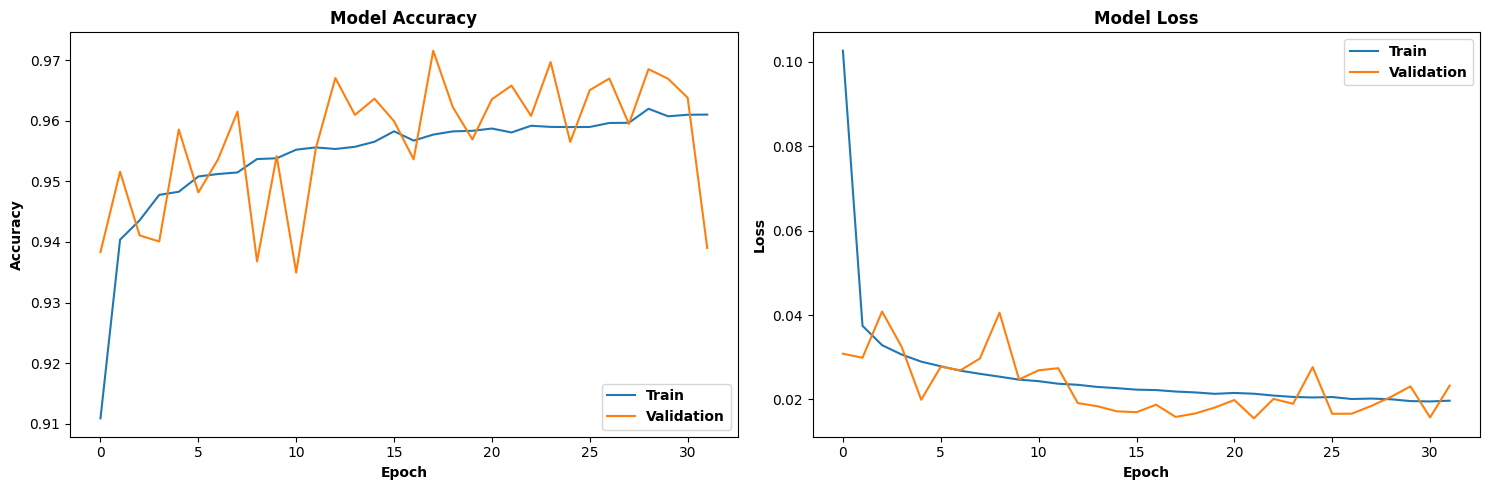

In [76]:
plot_training_history(history_ann_adadelta_Sinusoidal)

In [77]:
ann_adagrad_Sinusoidal = ann(optimizer='adagrad')
ann_adagrad_Sinusoidal.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 3)                 12        
                                                                 
 dense_65 (Dense)            (None, 100)               400       
                                                                 
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dense_67 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
history_ann_adagrad_Sinusoidal = ann_adagrad_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2805 - accuracy: 0.8316 - val_loss: 0.0659 - val_accuracy: 0.9055
Epoch 2/150
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0573 - accuracy: 0.9109 - val_loss: 0.0506 - val_accuracy: 0.9165
Epoch 3/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0474 - accuracy: 0.9237 - val_loss: 0.0448 - val_accuracy: 0.9327
Epoch 4/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0410 - accuracy: 0.9346 - val_loss: 0.0373 - val_accuracy: 0.9412
Epoch 5/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0364 - accuracy: 0.9431 - val_loss: 0.0334 - val_accuracy: 0.9445
Epoch 6/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0333 - accuracy: 0.9472 - val_loss: 0.0314 - val_accuracy: 0.9490
Epoch 7/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0312 - accuracy: 0.9492 - val_loss: 0.0295 - v

In [79]:
test_loss_ann_adagrad_Sinusoidal, test_acc_ann_adagrad_Sinusoidal = ann_adagrad_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adagrad_Sinusoidal)

938/938 [==============================] - 1s 1ms/step - loss: 0.0123 - accuracy: 0.9703
Testing the Model :
Testing Loss : 0.01233816146850586
Testing Accuracy : 0.9703333377838135


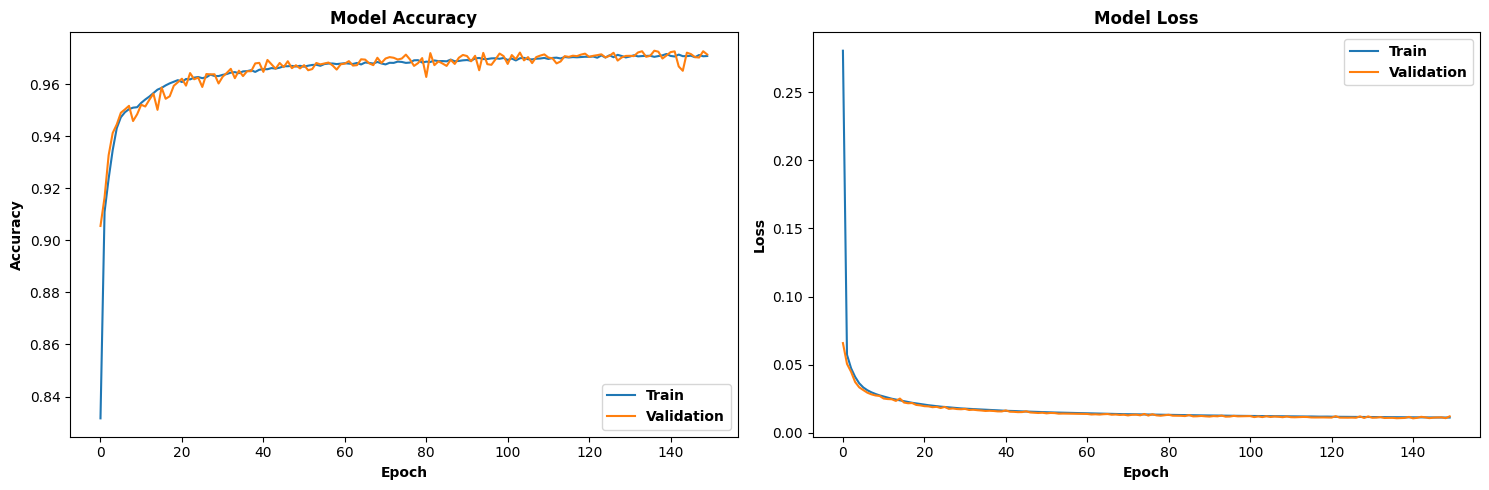

In [80]:
plot_training_history(history_ann_adagrad_Sinusoidal)

In [81]:
ann_rmsprop_Sinusoidal = ann(optimizer='rmsprop')
ann_rmsprop_Sinusoidal.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 3)                 12        
                                                                 
 dense_69 (Dense)            (None, 100)               400       
                                                                 
 dense_70 (Dense)            (None, 100)               10100     
                                                                 
 dense_71 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
history_ann_rmsprop_Sinusoidal = ann_rmsprop_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1323 - accuracy: 0.8950 - val_loss: 0.0452 - val_accuracy: 0.9211
Epoch 2/150
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0468 - accuracy: 0.9300 - val_loss: 0.0409 - val_accuracy: 0.9230
Epoch 3/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0411 - accuracy: 0.9345 - val_loss: 0.0279 - val_accuracy: 0.9575
Epoch 4/150
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0376 - accuracy: 0.9387 - val_loss: 0.0384 - val_accuracy: 0.9380
Epoch 5/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0353 - accuracy: 0.9407 - val_loss: 0.0254 - val_accuracy: 0.9453
Epoch 6/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0337 - accuracy: 0.9407 - val_loss: 0.0551 - val_accuracy: 0.9270
Epoch 7/150
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0324 - accuracy: 0.9441 - val_loss: 0.0240 - va

In [83]:
test_loss_ann_rmsprop_Sinusoidal, test_acc_ann_rmsprop_Sinusoidal = ann_rmsprop_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_rmsprop_Sinusoidal)

938/938 [==============================] - 1s 1ms/step - loss: 0.0142 - accuracy: 0.9687
Testing the Model :
Testing Loss : 0.014225427992641926
Testing Accuracy : 0.9687333106994629


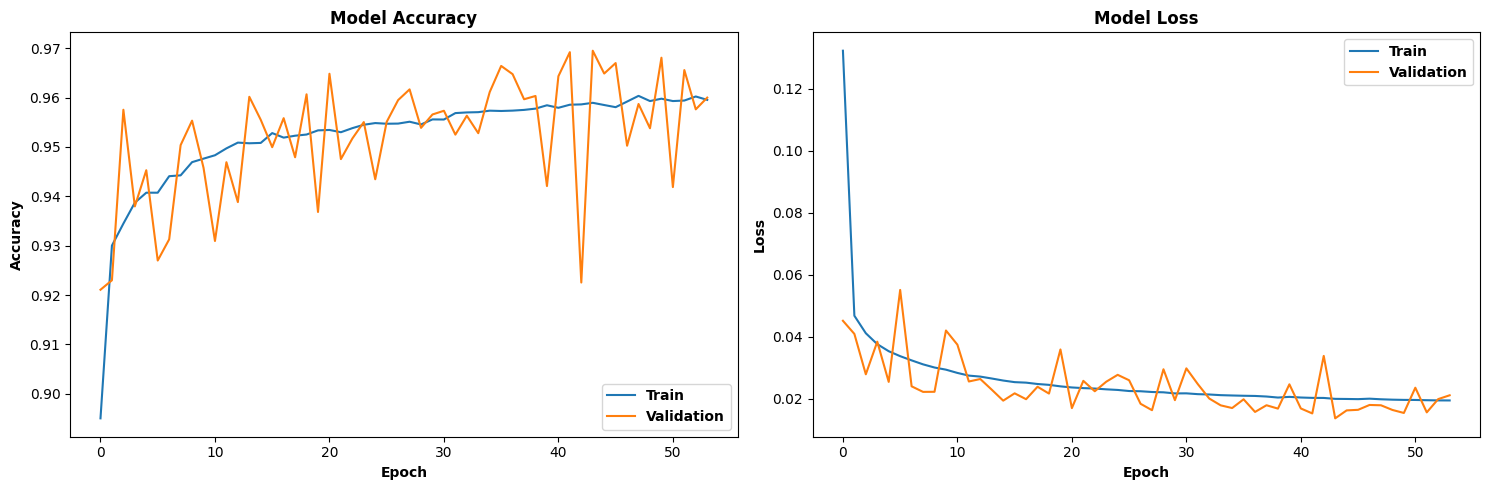

In [84]:
plot_training_history(history_ann_rmsprop_Sinusoidal)

In [85]:
ann_sgd_Sinusoidal = ann(optimizer='sgd')
ann_sgd_Sinusoidal.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 3)                 12        
                                                                 
 dense_73 (Dense)            (None, 100)               400       
                                                                 
 dense_74 (Dense)            (None, 100)               10100     
                                                                 
 dense_75 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
history_ann_sgd_Sinusoidal = ann_sgd_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 150, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/150
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1748 - accuracy: 0.8750 - val_loss: 0.1117 - val_accuracy: 0.9077
Epoch 2/150
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0720 - accuracy: 0.9104 - val_loss: 0.0737 - val_accuracy: 0.9030
Epoch 3/150
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0655 - accuracy: 0.9135 - val_loss: 0.0502 - val_accuracy: 0.9062
Epoch 4/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0621 - accuracy: 0.9146 - val_loss: 0.0615 - val_accuracy: 0.9209
Epoch 5/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0589 - accuracy: 0.9178 - val_loss: 0.0483 - val_accuracy: 0.9220
Epoch 6/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0579 - accuracy: 0.9205 - val_loss: 0.0406 - val_accuracy: 0.9388
Epoch 7/150
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0560 - accuracy: 0.9208 - val_loss: 0.0648 - v

In [87]:
test_loss_ann_sgd_Sinusoidal, test_acc_ann_sgd_Sinusoidal = ann_sgd_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_sgd_Sinusoidal)

938/938 [==============================] - 1s 962us/step - loss: 0.0311 - accuracy: 0.9351
Testing the Model :
Testing Loss : 0.031109724193811417
Testing Accuracy : 0.9351000189781189


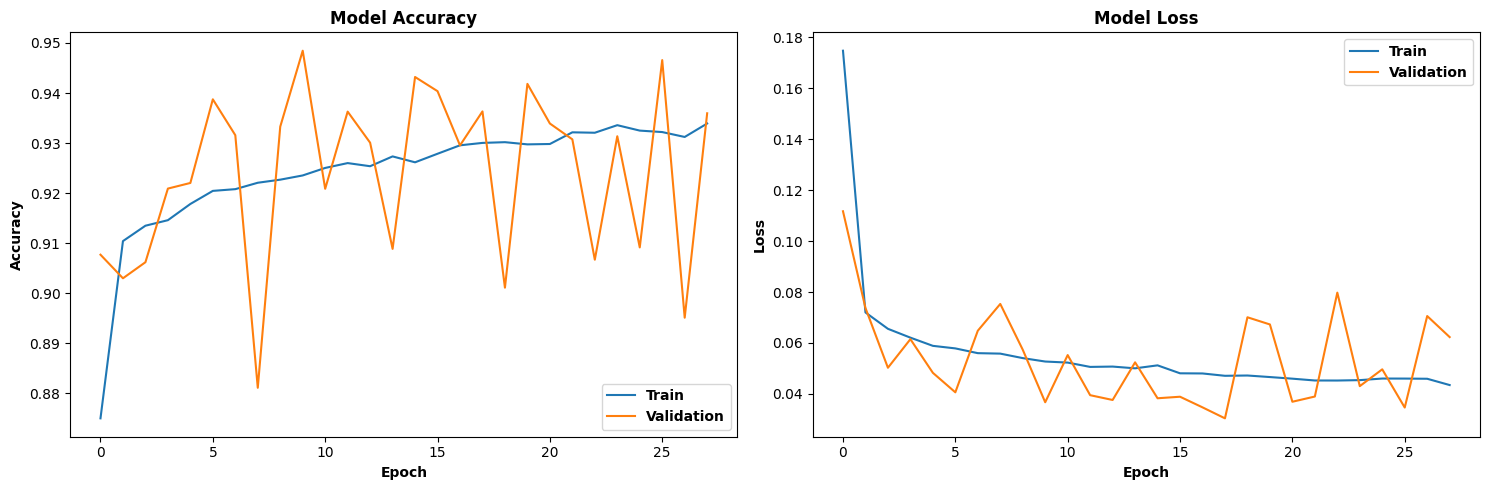

In [88]:
plot_training_history(history_ann_sgd_Sinusoidal)

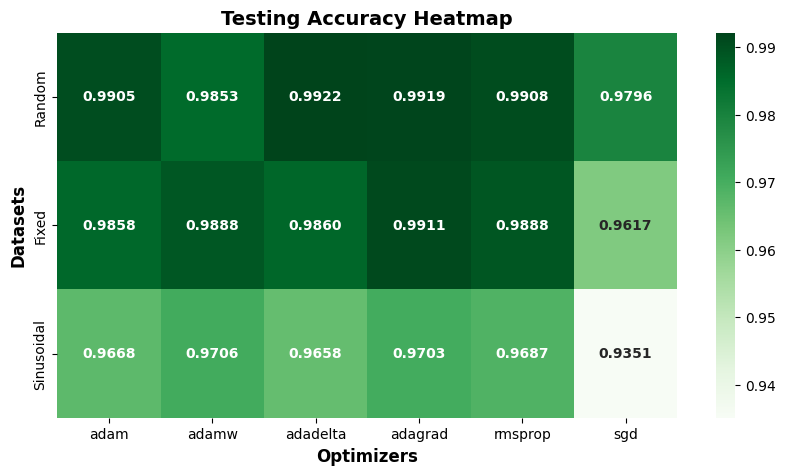

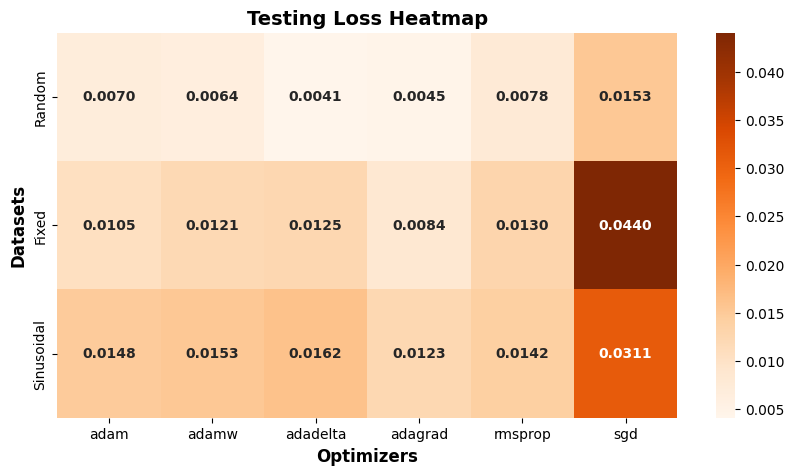

In [118]:
datasets = ["Random", "Fixed", "Sinusoidal"]
optimizers = ["adam", "adamw", "adadelta", "adagrad", "rmsprop", "sgd"]

accuracy_matrix = np.array([[globals()[f"test_acc_ann_{opt}_{ds}"] for opt in optimizers] for ds in datasets])
loss_matrix = np.array([[globals()[f"test_loss_ann_{opt}_{ds}"] for opt in optimizers] for ds in datasets])

def plot_heatmap(matrix, title, cmap, xlabel, ylabel, annot_format=".4f"):
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(
        matrix, annot=True, fmt=annot_format, cmap=cmap, 
        xticklabels=optimizers, yticklabels=datasets, 
        annot_kws={"weight": "bold"}
    )
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()

plot_heatmap(accuracy_matrix, "Testing Accuracy Heatmap", cmap="Greens", xlabel="Optimizers", ylabel="Datasets")

plot_heatmap(loss_matrix, "Testing Loss Heatmap", cmap="Oranges", xlabel="Optimizers", ylabel="Datasets")